# INTRODUCTION
* In this notebook, we will learn how to use plotly library.
    * Plotly library: Plotly's Python graphing library makes interactive, publication-quality graphs online. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.

<br>Content:
1. [Loading Data and Explanation of Features](#1)
1. [Line Charts](#2)
1. [Scatter Charts](#3)
1. [Bar Charts](#4)
1. [Pie Charts](#5)
1. [Bubble Charts](#6)
1. [Histogram](#7)
1. [Word Cloud](#8)
1. [Box Plot](#9)
1. [Scatter Plot Matrix](#10)
1. [Inset Plots](#11)
1. [3D Scatter Plot with Colorscaling](#12)
1. [Multiple Subplots](#13)


In [1]:
# pip install plotly
# pip install wordcloud
# pip install chart-studio

In [2]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# plotly
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./input"))

# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', 'world-university-rankings']


<a id="1"></a> <br>
# Loading Data and Explanation of Features
<font color='red'>
* timesData includes 14 features that are:
    <font color='black'>
    * world_rank             
    * university_name       
    * country               
    * teaching                
    * international            
    * research                 
    * citations                
    * income                   
    * total_score              
    * num_students             
    * student_staff_ratio      
    * international_students   
    * female_male_ratio        
    * year 

In [3]:
# Load data that we will use.
timesData = pd.read_csv("./input/world-university-rankings/timesData.csv")

In [4]:
# information about timesData
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
world_rank                2603 non-null object
university_name           2603 non-null object
country                   2603 non-null object
teaching                  2603 non-null float64
international             2603 non-null object
research                  2603 non-null float64
citations                 2603 non-null float64
income                    2603 non-null object
total_score               2603 non-null object
num_students              2544 non-null object
student_staff_ratio       2544 non-null float64
international_students    2536 non-null object
female_male_ratio         2370 non-null object
year                      2603 non-null int64
dtypes: float64(4), int64(1), object(9)
memory usage: 284.8+ KB


In [5]:
timesData.head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


<a id="2"></a> <br>
# Line Charts
<font color='red'>
Line Charts Example: Citation and Teaching vs World Rank of Top 100 Universities
<font color='black'>
* Import graph_objs as *go*
* Creating traces
    * x = x axis
    * y = y axis
    * mode = type of plot like marker, line or line + markers
    * name = name of the plots
    * marker = marker is used with dictionary. 
        * color = color of lines. It takes RGB (red, green, blue) and opacity (alpha)
    * text = The hover text (hover is curser)
* data = is a list that we add traces into it
* layout = it is dictionary.
    * title = title of layout
    * x axis = it is dictionary
        * title = label of x axis
        * ticklen = length of x axis ticks
        * zeroline = showing zero line or not
* fig = it includes data and layout
* iplot() = plots the figure(fig) that is created by data and layout

In [6]:
# prepare data frame
df = timesData.iloc[:100,:]

# import graph objects as "go"
import plotly.graph_objs as go

# Creating trace1
trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df.university_name)
# Creating trace2
trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines+markers",
                    name = "teaching",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= df.university_name)
data = [trace1, trace2]
layout = dict(title = 'Citation and Teaching vs World Rank of Top 100 Universities',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

<a id="3"></a> <br>
# Scatter
<font color='red'>
Scatter Example: Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years
<font color='black'>
* Import graph_objs as *go*
* Creating traces
    * x = x axis
    * y = y axis
    * mode = type of plot like marker, line or line + markers
    * name = name of the plots
    * marker = marker is used with dictionary. 
        * color = color of lines. It takes RGB (red, green, blue) and opacity (alpha)
    * text = The hover text (hover is curser)
* data = is a list that we add traces into it
* layout = it is dictionary.
    * title = title of layout
    * x axis = it is dictionary
        * title = label of x axis
        * ticklen = length of x axis ticks
        * zeroline = showing zero line or not
    * y axis = it is dictionary and same with x axis
* fig = it includes data and layout
* iplot() = plots the figure(fig) that is created by data and layout

In [7]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]
# import graph objects as "go"
import plotly.graph_objs as go
# creating trace1
trace1 =go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df2014.university_name)
# creating trace2
trace2 =go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2015.university_name)
# creating trace3
trace3 =go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2016.university_name)
data = [trace1, trace2, trace3]
layout = dict(title = 'Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Citation',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

<a id="4"></a> <br>
# Bar Charts
<font color='red'>
First Bar Charts Example: citations and teaching of top 3 universities in 2014 (style1)
<font color='black'>
* Import graph_objs as *go*
* Creating traces
    * x = x axis
    * y = y axis
    * mode = type of plot like marker, line or line + markers
    * name = name of the plots
    * marker = marker is used with dictionary. 
        * color = color of lines. It takes RGB (red, green, blue) and opacity (alpha)
        * line = It is dictionary. line between bars
            * color = line color around bars
    * text = The hover text (hover is curser)
* data = is a list that we add traces into it
* layout = it is dictionary.
    * barmode = bar mode of bars like grouped
* fig = it includes data and layout
* iplot() = plots the figure(fig) that is created by data and layout

In [8]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
df2014

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1002,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.9,27%,33 : 67,2014
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,"20,152",8.9,25%,NaN,2014
1004,2,University of Oxford,United Kingdom,89.0,90.2,98.5,95.4,90.3,93.9,"19,919",11.6,34%,46 : 54,2014


In [9]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
# import graph objects as "go"
import plotly.graph_objs as go
# create trace1 
trace1 = go.Bar(
                x = df2014.university_name,
                y = df2014.citations,
                name = "citations",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2014.country)
# create trace2 
trace2 = go.Bar(
                x = df2014.university_name,
                y = df2014.teaching,
                name = "teaching",
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2014.country)
data = [trace1, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

<font color='red'>
Second Bar Charts Example: citations and teaching of top 3 universities in 2014 (style2)
<br> Actually, if you change only the barmode from *group* to *relative* in previous example, you achieve what we did here. However, for diversity I use different syntaxes. 
<font color='black'>
* Import graph_objs as *go*
* Creating traces
    * x = x axis
    * y = y axis
    * name = name of the plots
    * type = type of plot like bar plot
* data = is a list that we add traces into it
* layout = it is dictionary.
    * xaxis = label of x axis
    * barmode = bar mode of bars like grouped( previous example) or relative
    * title = title of layout
* fig = it includes data and layout
* iplot() = plots the figure(fig) that is created by data and layout

In [10]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
# import graph objects as "go"
import plotly.graph_objs as go

x = df2014.university_name

trace1 = {
  'x': x,
  'y': df2014.citations,
  'name': 'citation',
  'type': 'bar'
};
trace2 = {
  'x': x,
  'y': df2014.teaching,
  'name': 'teaching',
  'type': 'bar'
};
data = [trace1, trace2];
layout = {
  'xaxis': {'title': 'Top 3 universities'},
  'barmode': 'relative',
  'title': 'citations and teaching of top 3 universities in 2014'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

<font color='red'>
Third Bar Charts Example: Horizontal bar charts.  (style3) Citation vs income for universities
<font color='black'>
* Import graph_objs as *go* and importing tools
    *  Tools: used for subplots
* Creating trace1 
    * bar: bar plot
        * x = x axis 
        * y = y axis
        * marker
            * color: color of bars
            * line: bar line color and width
        * name: name of bar
        * orientation: orientation like horizontal 
   * creating trace2
       * scatter: scatter plot
           * x = x axis 
            * y = y axis
            * mode: scatter type line line + markers or only markers
            * line: properties of line
                * color: color of line
            * name: name of scatter plot
    * layout: axis, legend, margin, paper and plot properties
        * 

In [11]:
# import graph objects as "go" and import tools
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt
# prepare data frames
df2016 = timesData[timesData.year == 2016].iloc[:7,:]

y_saving = [each for each in df2016.research]
y_net_worth  = [float(each) for each in df2016.income]
x_saving = [each for each in df2016.university_name]
x_net_worth  = [each for each in df2016.university_name]
trace0 = go.Bar(
                x=y_saving,
                y=x_saving,
                marker=dict(color='rgba(171, 50, 96, 0.6)',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                name='research',
                orientation='h',
)
trace1 = go.Scatter(
                x=y_net_worth,
                y=x_net_worth,
                mode='lines+markers',
                line=dict(color='rgb(63, 72, 204)'),
                name='income',
)
layout = dict(
                title='Citations and income',
                yaxis=dict(showticklabels=True,domain=[0, 0.85]),
                yaxis2=dict(showline=True,showticklabels=False,linecolor='rgba(102, 102, 102, 0.8)',linewidth=2,domain=[0, 0.85]),
                xaxis=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0, 0.42]),
                xaxis2=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0.47, 1],side='top',dtick=25),
                legend=dict(x=0.029,y=1.038,font=dict(size=10) ),
                margin=dict(l=200, r=20,t=70,b=70),
                paper_bgcolor='rgb(248, 248, 255)',
                plot_bgcolor='rgb(248, 248, 255)',
)
annotations = []
y_s = np.round(y_saving, decimals=2)
y_nw = np.rint(y_net_worth)
# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, x_saving):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn - 4,text='{:,}'.format(ydn),font=dict(family='Arial', size=12,color='rgb(63, 72, 204)'),showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd + 3,text=str(yd),font=dict(family='Arial', size=12,color='rgb(171, 50, 96)'),showarrow=False))

layout['annotations'] = annotations

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)
iplot(fig)

/home/sdmohant/.virtualenvs/datascience/local/lib/python2.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



<a id="5"></a> <br>
# Pie Charts
<font color='red'>
Pie Charts Example: Students rate of top 7 universities in 2016
<font color='black'>
* fig: create figures
    * data: plot type
        * values: values of plot
        * labels: labels of plot
        * name: name of plots
        * hoverinfo: information in hover
        * hole: hole width
        * type: plot type like pie
    * layout: layout of plot
        * title: title of layout
        * annotations: font, showarrow, text, x, y

In [12]:
# data preparation
df2016 = timesData[timesData.year == 2016].iloc[:7,:]
pie1 = df2016.num_students
pie1_list = [float(each.replace(',', '.')) for each in df2016.num_students]  # str(2,4) => str(2.4) = > float(2.4) = 2.4
labels = df2016.university_name
# figure
fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "Number Of Students Rates",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Universities Number of Students rates",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Number of Students",
                "x": 0.20,
                "y": 1
            },
        ]
    }
}
iplot(fig)

<a id="6"></a> <br>
# Bubble Charts
<font color='red'>
Bubble Charts Example: University world rank (first 20) vs teaching score with number of students(size) and international score (color) in 2016
<font color='black'>
* x = x axis
* y = y axis
* mode = markers(scatter)
*  marker = marker properties
    * color = third dimension of plot. Internaltional score
    * size = fourth dimension of plot. Number of students
* text: university names

In [13]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 1803 to 1809
Data columns (total 14 columns):
world_rank                7 non-null object
university_name           7 non-null object
country                   7 non-null object
teaching                  7 non-null float64
international             7 non-null object
research                  7 non-null float64
citations                 7 non-null float64
income                    7 non-null object
total_score               7 non-null object
num_students              7 non-null object
student_staff_ratio       7 non-null float64
international_students    7 non-null object
female_male_ratio         6 non-null object
year                      7 non-null int64
dtypes: float64(4), int64(1), object(9)
memory usage: 840.0+ bytes


In [14]:
# data preparation
df2016 = timesData[timesData.year == 2016].iloc[:20,:]
num_students_size  = [float(each.replace(',', '.')) for each in df2016.num_students]
international_color = [float(each) for each in df2016.international]
data = [
    {
        'y': df2016.teaching,
        'x': df2016.world_rank,
        'mode': 'markers',
        'marker': {
            'color': international_color,
            'size': num_students_size,
            'showscale': True
        },
        "text" :  df2016.university_name    
    }
]
iplot(data)

<a id="7"></a> <br>
# Histogram
<font color='red'>
Lets look at histogram of students-staff ratio in 2011 and 2012 years. 
    <font color='black'>
* trace1 = first histogram
    * x = x axis
    * y = y axis
    * opacity = opacity of histogram
    * name = name of legend
    * marker = color of histogram
* trace2 = second histogram
* layout = layout 
    * barmode = mode of histogram like overlay. Also you can change it with *stack*

In [15]:
# prepare data
x2011 = timesData.student_staff_ratio[timesData.year == 2011]
x2012 = timesData.student_staff_ratio[timesData.year == 2012]

trace1 = go.Histogram(
    x=x2011,
    opacity=0.75,
    name = "2011",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))
trace2 = go.Histogram(
    x=x2012,
    opacity=0.75,
    name = "2012",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))

data = [trace1, trace2]
layout = go.Layout(barmode='overlay',
                   title=' students-staff ratio in 2011 and 2012',
                   xaxis=dict(title='students-staff ratio'),
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

<a id="8"></a> <br>
# Word Cloud
Not a pyplot but learning it is good for visualization. Lets look at which country is mentioned most in 2011.
* WordCloud = word cloud library that I import at the beginning of kernel
    * background_color = color of back ground
    * generate = generates the country name list(x2011) a word cloud

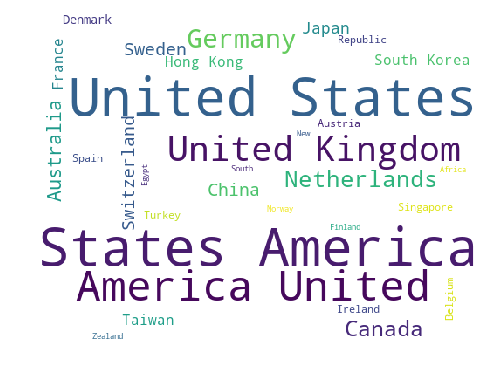

In [16]:
# data prepararion
x2011 = timesData.country[timesData.year == 2011]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

<a id="9"></a> <br>
# Box Plots
<font color='red'>
* Box Plots
    * Median (50th percentile) = middle value of the data set. Sort and take the data in the middle. It is also called 50% percentile that is 50% of data are less that median(50th quartile)(quartile)
        * 25th percentile = quartile 1 (Q1) that is lower quartile
        * 75th percentile = quartile 3 (Q3) that is higher quartile
        * height of box = IQR = interquartile range = Q3-Q1
        * Whiskers = 1.5 * IQR from the Q1 and Q3
        * Outliers = being more than 1.5*IQR away from median commonly.
        
    <font color='black'>
    * trace = box
        * y = data we want to visualize with box plot 
        * marker = color

In [17]:
# data preparation
x2015 = timesData[timesData.year == 2015]

trace0 = go.Box(
    y=x2015.total_score,
    name = 'total score of universities in 2015',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace1 = go.Box(
    y=x2015.research,
    name = 'research of universities in 2015',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)
data = [trace0, trace1]
iplot(data)

<a id="10"></a> <br>
# Scatter Matrix Plots
<font color='red'>
Scatter Matrix = it helps us to see covariance and relation between more than 2 features
<font color='black'>
* import figure factory as ff
* create_scatterplotmatrix = creates scatter plot
    * data2015 = prepared data. It includes research, international and total scores with index from 1 to 401
    * colormap = color map of scatter plot
    * colormap_type = color type of scatter plot
    * height and weight

In [18]:
# import figure factory
import plotly.figure_factory as ff
# prepare data
dataframe = timesData[timesData.year == 2015]
data2015 = dataframe.loc[:,["research","international", "total_score"]]
data2015["index"] = np.arange(1,len(data2015)+1)
# scatter matrix
fig = ff.create_scatterplotmatrix(data2015, diag='box', index='index',colormap='Portland',
                                  colormap_type='cat',
                                  height=700, width=700)
iplot(fig)

<a id="11"></a> <br>
# Inset Plots
<font color='red'>
Inset Matrix = 2 plots are in one frame
<font color='black'>

In [19]:
# first line plot
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.teaching,
    name = "teaching",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
)
# second line plot
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x2',
    yaxis='y2',
    name = "income",
    marker = dict(color = 'rgba(160, 112, 20, 0.8)'),
)
data = [trace1, trace2]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.6, 0.95],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = 'Income and Teaching vs World Rank of Universities'

)

fig = go.Figure(data=data, layout=layout)
iplot(fig)


<a id="12"></a> <br>
# 3D Scatter Plot with Colorscaling
<font color='red'>
3D Scatter: Sometimes 2D is not enough to understand data. Therefore adding one more dimension increase the intelligibility of the data. Even we will add color that is actually 4th dimension.
<font color='black'>
* go.Scatter3d: create 3d scatter plot
* x,y,z: axis of plots
* mode: market that is scatter
* size: marker size
* color: axis of colorscale
* colorscale:  actually it is 4th dimension

In [20]:
# create trace 1 that is 3d scatter
trace1 = go.Scatter3d(
    x=dataframe.world_rank,
    y=dataframe.research,
    z=dataframe.citations,
    mode='markers',
    marker=dict(
        size=10,
        color='rgb(255,0,0)',                # set color to an array/list of desired values      
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

<a id="13"></a> <br>
# Multiple Subplots
<font color='red'>
Multiple Subplots: While comparing more than one features, multiple subplots can be useful.
<font color='black'>



In [21]:
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.research,
    name = "research"
)
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.citations,
    xaxis='x2',
    yaxis='y2',
    name = "citations"
)
trace3 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x3',
    yaxis='y3',
    name = "income"
)
trace4 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.total_score,
    xaxis='x4',
    yaxis='y4',
    name = "total_score"
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1]
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Research, citation, income and total score VS World Rank of Universities'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

More references:

1. Map Plots: 
    1. https://www.kaggle.com/kanncaa1/time-series-prediction-with-eda-of-world-war-2
    1. https://towardsdatascience.com/getting-started-with-plot-ly-3c73706a837c
    1. https://plot.ly/python/ipython-notebook-tutorial/#plotting-interactive-maps
1. Data Visualization
    1. Seaborn: https://www.kaggle.com/kanncaa1/seaborn-for-beginners
    1. Bokeh 1: https://www.kaggle.com/kanncaa1/interactive-bokeh-tutorial-part-1
    1. Bokeh 2: https://www.kaggle.com/kanncaa1/interactive-bokeh-tutorial-part-
    1. Rare Visualization: https://www.kaggle.com/kanncaa1/rare-visualization-tools
    1. Earthquake Animation: https://www.kaggle.com/kanncaa1/earthquake-animation-with-plotly